# Flower Classification using VGG16 Model

### Importing Dependencies

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import tensorflow as tf
from tensorflow import keras
tf.config.experimental.get_device_details(tf.config.experimental.list_physical_devices()[1])

{'compute_capability': (6, 1), 'device_name': 'NVIDIA GeForce GTX 1070'}

### Load Flower Dataset
Dataset URL: https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset

No. of Classes: 5

Classes: Lilly, Lotus, Orchid, Sunflower, Tulip

Total Images: 5000 

In [2]:
input_shape = (224, 224, 3)
image_shape = (224, 224)
num_classes = 5
batch_size = 32

train_data, val_data = keras.utils.image_dataset_from_directory('flower_images', batch_size=batch_size, image_size=image_shape, label_mode='categorical', seed=225, validation_split= 0.2, subset='both')

Found 4999 files belonging to 5 classes.
Using 4000 files for training.
Using 999 files for validation.


### Model Definition

In [3]:
input = keras.Input(shape=input_shape)

x = keras.layers.Rescaling(scale=1./255)(input)

x = keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='same', activation='relu')(x)
# x = keras.layers.Conv2D(filters=64, padding='same', kernel_size=3, strides=(1,1), activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1,1), padding='same', activation='relu')(x)
# x = keras.layers.Conv2D(filters=128, padding='same', kernel_size=3, strides=(1,1), activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=256, kernel_size=3, strides=(1,1), padding='same', activation='relu')(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, strides=(1,1), padding='same', activation='relu')(x)
# x = keras.layers.Conv2D(filters=256, padding='same', kernel_size=3, strides=(1,1), activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=512, kernel_size=3, strides=(1,1), padding='same', activation='relu')(x)
x = keras.layers.Conv2D(filters=512, kernel_size=3, strides=(1,1), padding='same', activation='relu')(x)
# x = keras.layers.Conv2D(filters=512, padding='same', kernel_size=3, strides=(1,1), activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)

x = keras.layers.Conv2D(filters=512, kernel_size=3, strides=(1,1), padding='same', activation='relu')(x)
x = keras.layers.Conv2D(filters=512, kernel_size=3, strides=(1,1), padding='same', activation='relu')(x)
# x = keras.layers.Conv2D(filters=512, padding='same', kernel_size=3, strides=(1,1), activation='relu')(x)
x = keras.layers.MaxPool2D(pool_size=2)(x)

x = keras.layers.Flatten()(x)
# x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(units=512, activation='relu')(x)
x = keras.layers.Dense(units=512, activation='relu')(x)


output = keras.layers.Dense(units=num_classes, activation='softmax')(x)

model = keras.Model(inputs=input, outputs=output, name='VGG16')

In [4]:
model.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                         

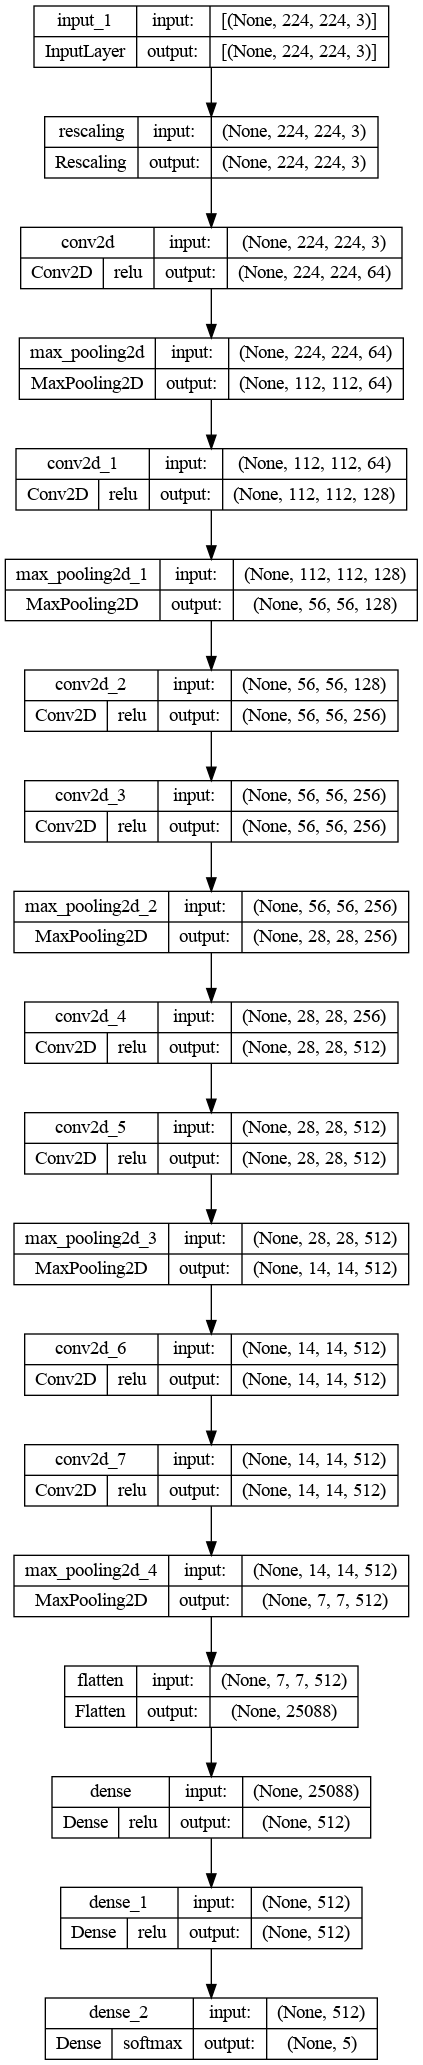

In [5]:
keras.utils.plot_model(model, to_file='VGG16.png', show_layer_activations=True, show_shapes=True)

### Model Training

In [6]:
def lr_schedule(epoch, lr):
    if epoch % 20 == 0 and epoch != 0:
        return lr / 10
    else:
        return lr
    
callbacks = [keras.callbacks.TensorBoard(), keras.callbacks.LearningRateScheduler(lr_schedule), keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15)]

In [7]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics='accuracy')

model.fit(train_data, epochs=100, batch_size=batch_size, validation_data=val_data, callbacks=callbacks, verbose='auto')

Epoch 1/100
125/125 [==============================] - 39s 234ms/step - loss: 1.6250 - accuracy: 0.1992 - val_loss: 1.6055 - val_accuracy: 0.2733 - lr: 0.0010
Epoch 2/100
125/125 [==============================] - 29s 230ms/step - loss: 1.5421 - accuracy: 0.2595 - val_loss: 1.3327 - val_accuracy: 0.3844 - lr: 0.0010
Epoch 3/100
125/125 [==============================] - 29s 231ms/step - loss: 1.3380 - accuracy: 0.3812 - val_loss: 1.2995 - val_accuracy: 0.4114 - lr: 0.0010
Epoch 4/100
125/125 [==============================] - 41s 328ms/step - loss: 1.3007 - accuracy: 0.4002 - val_loss: 1.2364 - val_accuracy: 0.4234 - lr: 0.0010
Epoch 5/100
125/125 [==============================] - 29s 227ms/step - loss: 1.2329 - accuracy: 0.4218 - val_loss: 1.2166 - val_accuracy: 0.4474 - lr: 0.0010
Epoch 6/100
125/125 [==============================] - 30s 234ms/step - loss: 1.1884 - accuracy: 0.4670 - val_loss: 1.1951 - val_accuracy: 0.4755 - lr: 0.0010
Epoch 7/100
125/125 [=========================